In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const 
from matplotlib.colors import LogNorm
from matplotlib import gridspec

## original data
Is located on hemera at

```
/bigdata/hplsim/aipp/Jeyhun/khi/part_rad/metrics/002_900_1001_yci9wlgu
```


In [22]:
omega_rad = np.logspace(np.log10(0.1), np.log10(200), 512) # in [omega_pe]

In [23]:
UNIT_ENERGY = 7.42701e-11
UNIT_TIME = 1.79e-16

UNIT_MASS = 8.26366e-28
UNIT_LENGTH = 5.36628e-08
UNIT_SPEED = 2.99792e+08

typical_weigthing = 907.159

In [24]:
UNIT_MASS * UNIT_SPEED / typical_weigthing / (const.electron_mass * const.c)

0.9999985437617303

In [33]:
data_gpu = {}
N_GPUs = 64
for i in range(N_GPUs):
    data_gpu[i] = np.load("../002_data/002_900_1001_yci9wlgu/data_gpu_{}_tindex_950.npz".format(i))


In [31]:
for i in data_gpu[0].keys():
    print(i)

rad_gt
rad_pred
ps_gt
ps_pr_inn
ps_pr_ae


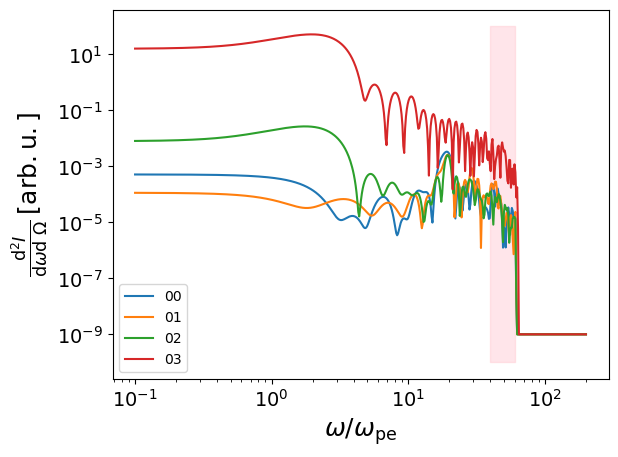

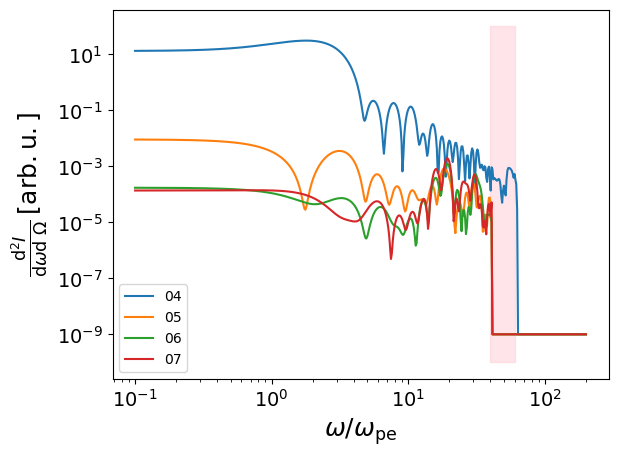

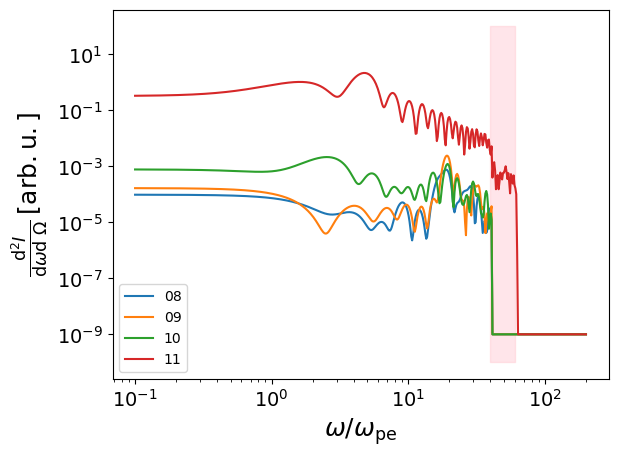

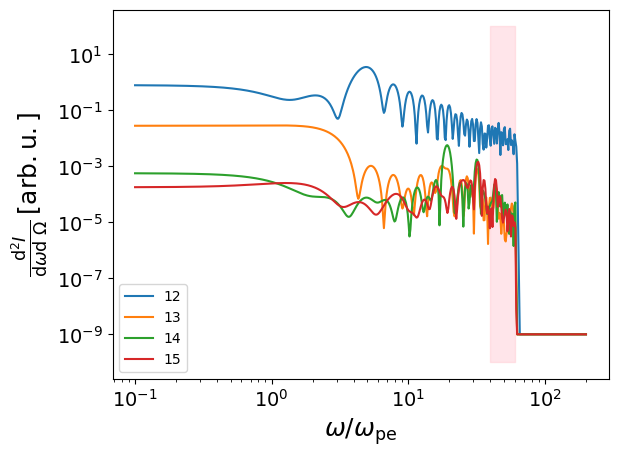

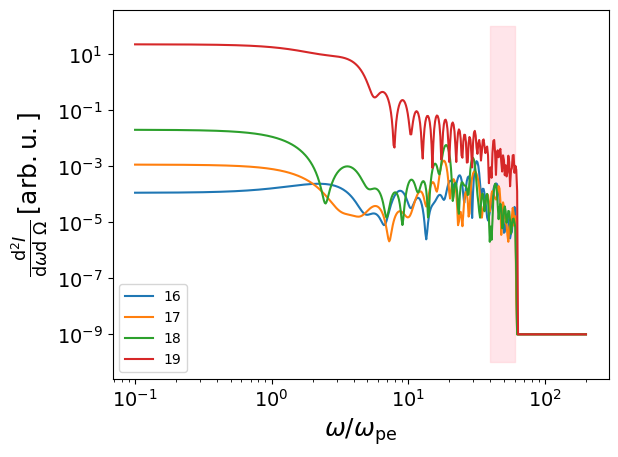

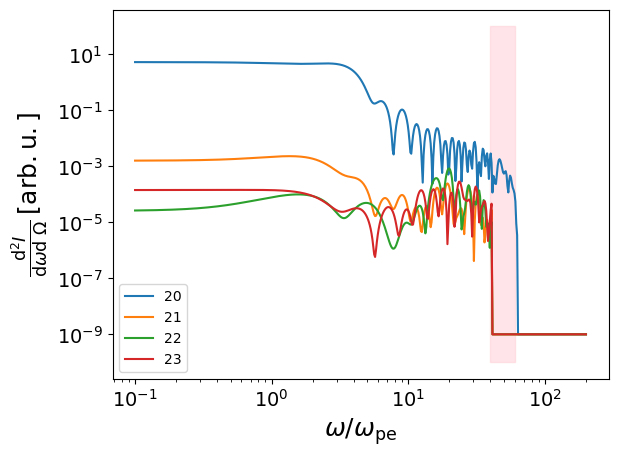

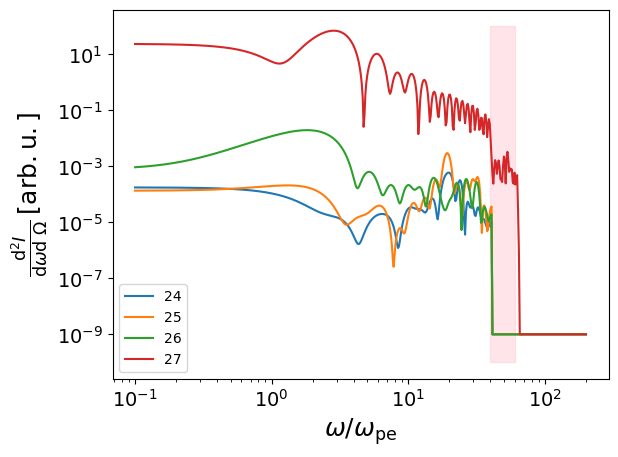

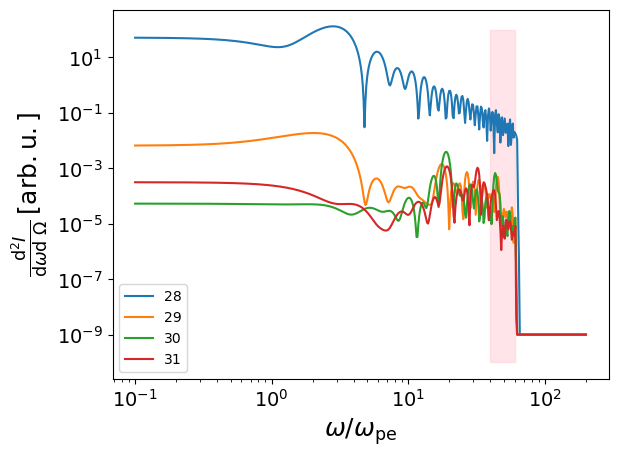

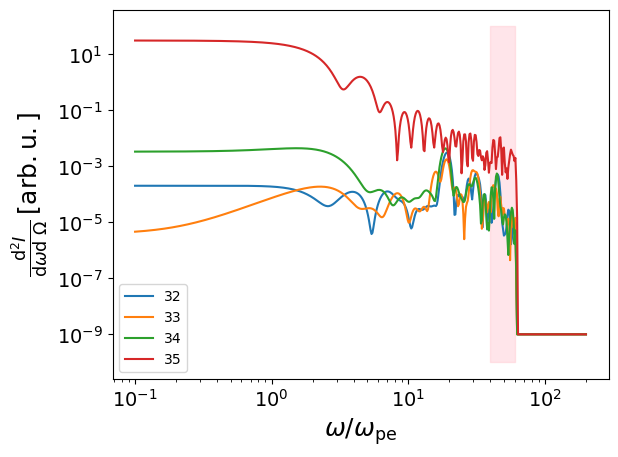

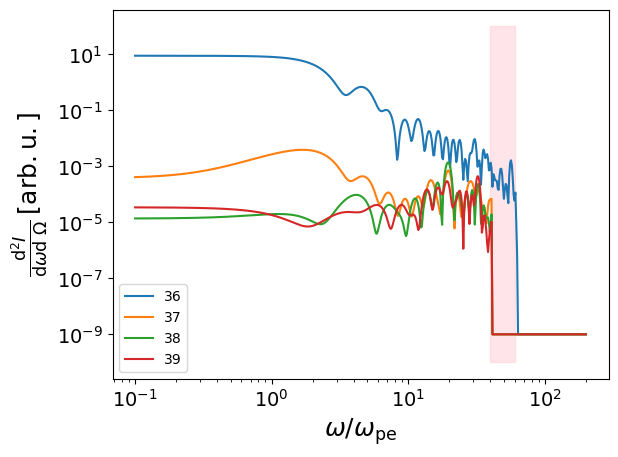

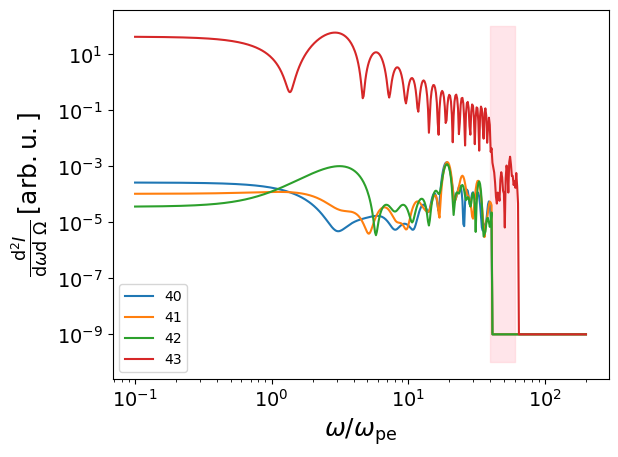

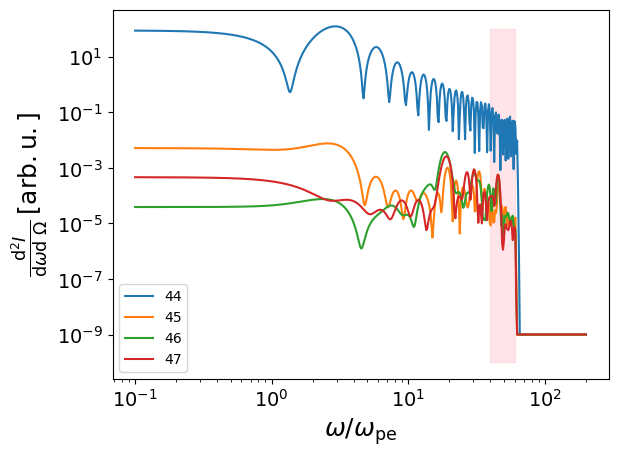

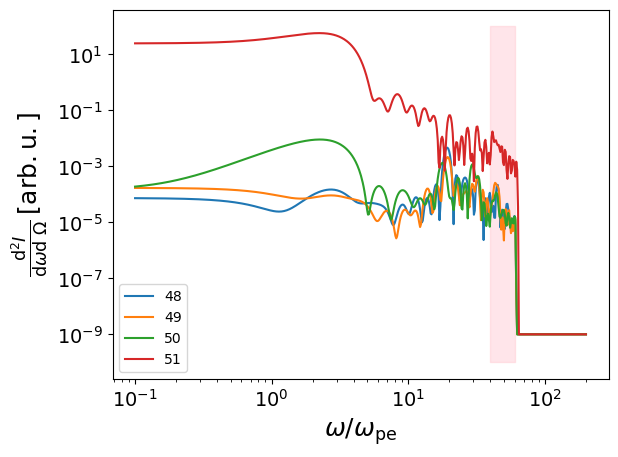

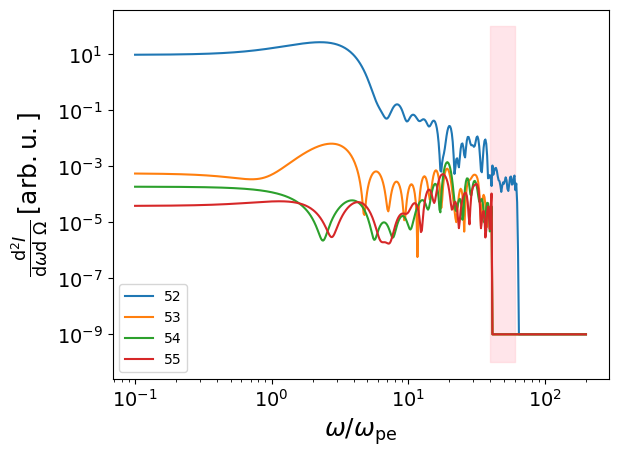

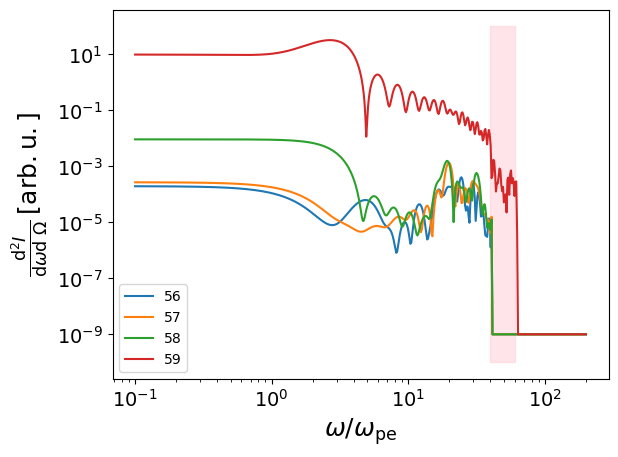

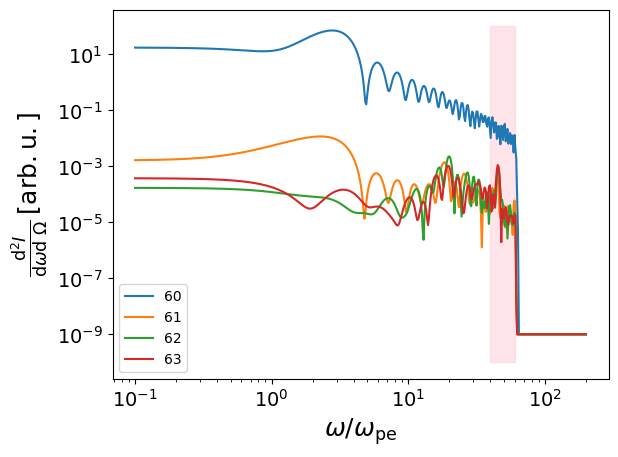

In [40]:
for i in range(N_GPUs):
    plt.plot(omega_rad, np.exp(data_gpu[i]["rad_gt"]) , label="{:02d}".format(i))
    
    if ((i-3) % 4) == 0:
        plt.fill_betweenx([1e-10, 1e2], 40 , 60, color="pink", alpha=0.4)
        plt.xscale("log")
        plt.yscale("log")

        plt.xlabel(r"$\omega /\omega_\mathrm{pe}$", fontsize=18)
        plt.xticks(fontsize=14)

        plt.ylabel(r"$\frac{\mathrm{d}^2 I}{\mathrm{d} \omega \mathrm{d} \Omega} \, \mathrm{[arb.u.]}$", fontsize=18)
        plt.yticks(fontsize=14)

        plt.legend(loc=3)

        plt.show()

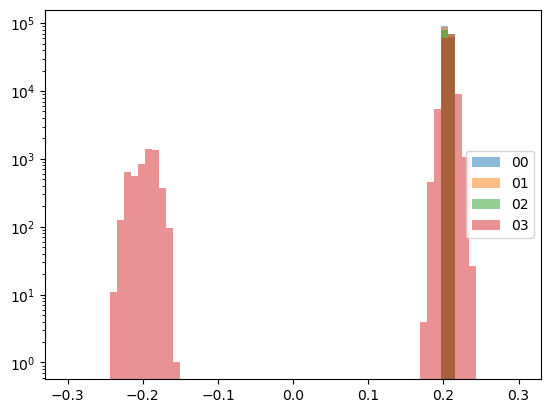

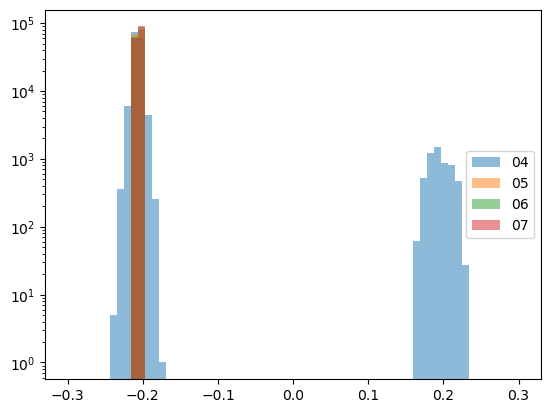

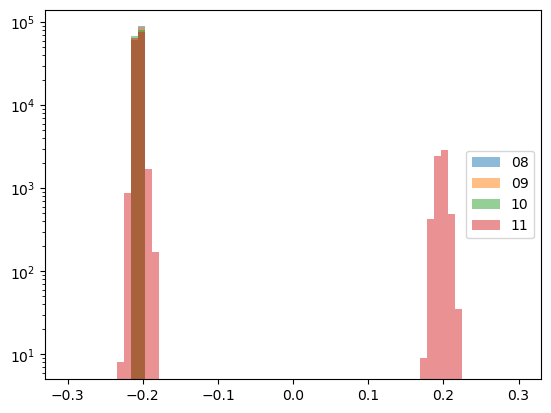

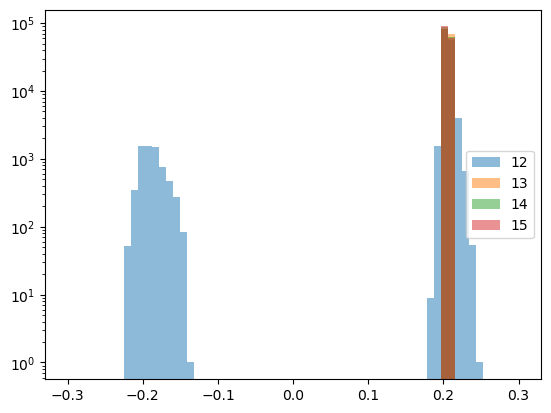

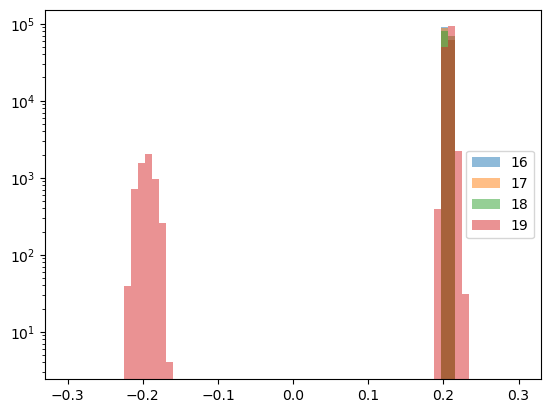

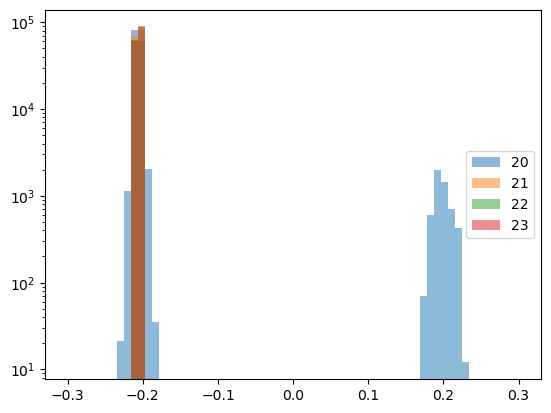

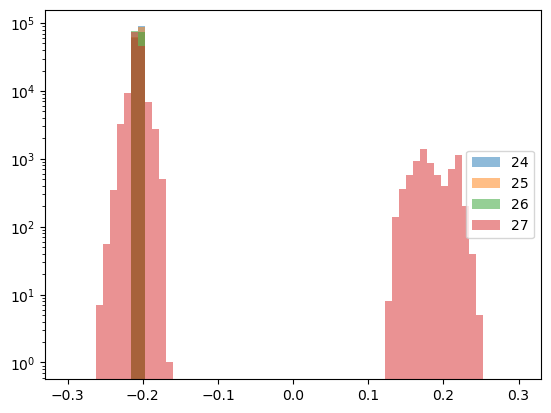

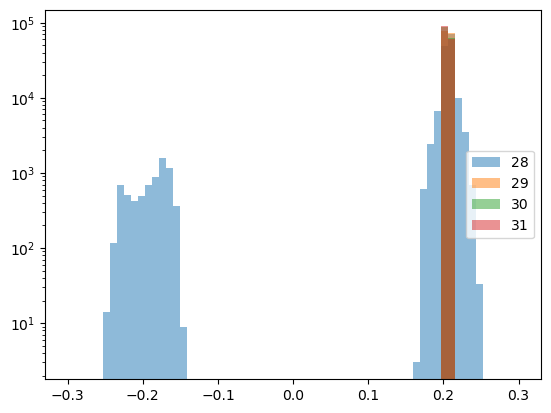

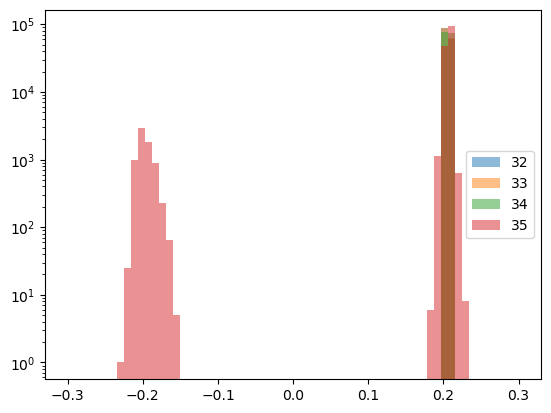

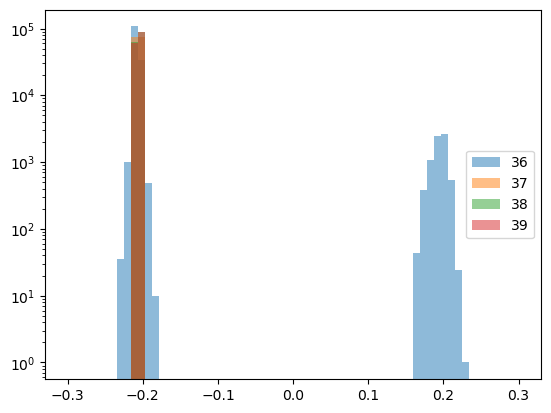

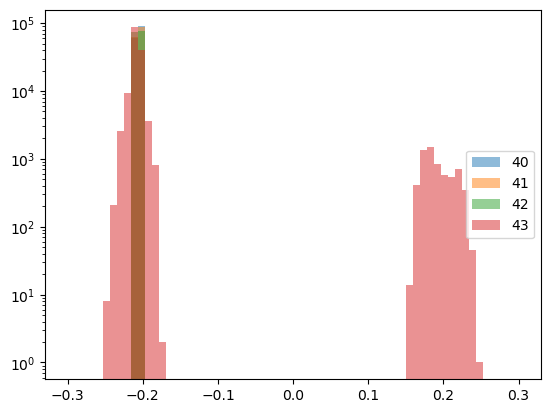

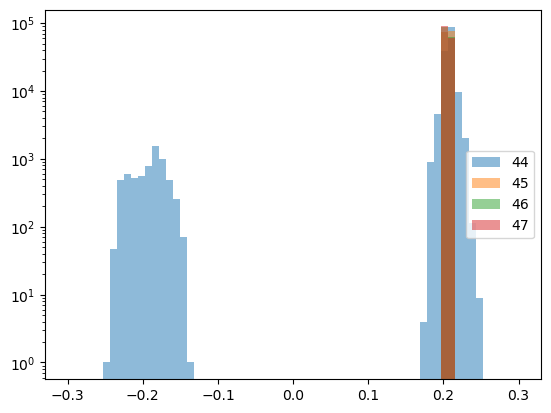

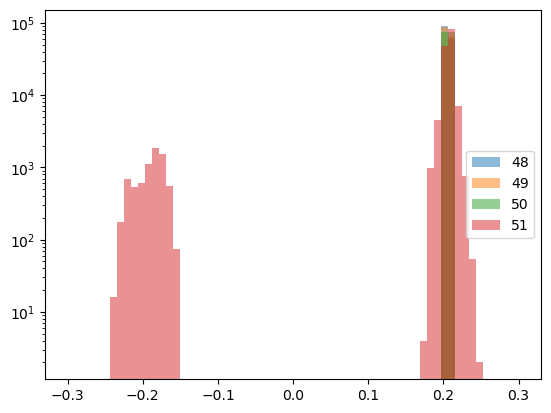

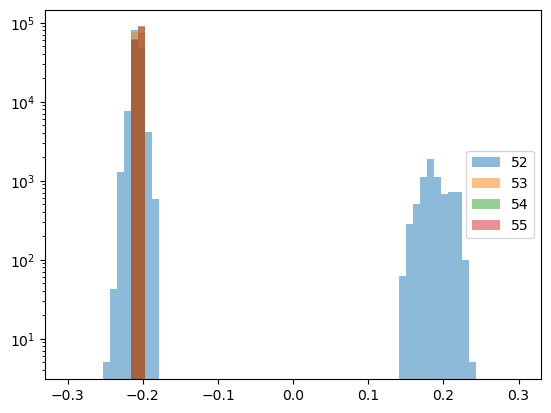

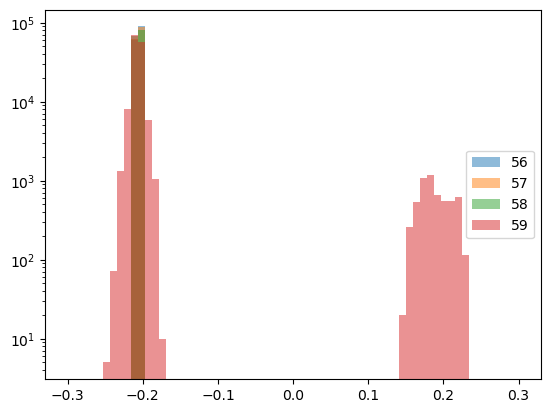

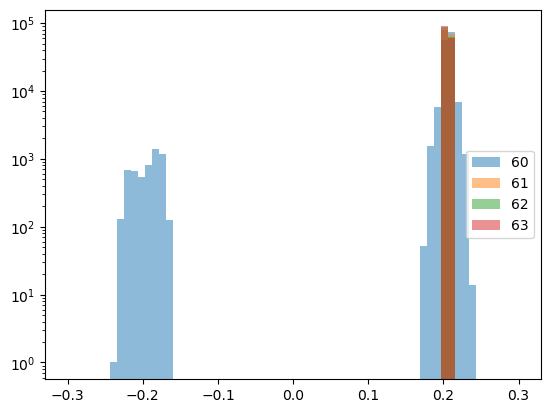

In [42]:
for i in range(N_GPUs):
    plt.hist(data_gpu[i]["ps_gt"][:, 0], bins=64, range=(-0.3, +0.3), label="{:02d}".format(i), alpha=0.5)

    if ((i-3) % 4) == 0:
        plt.yscale("log")
        plt.legend(loc=5)
        plt.show()

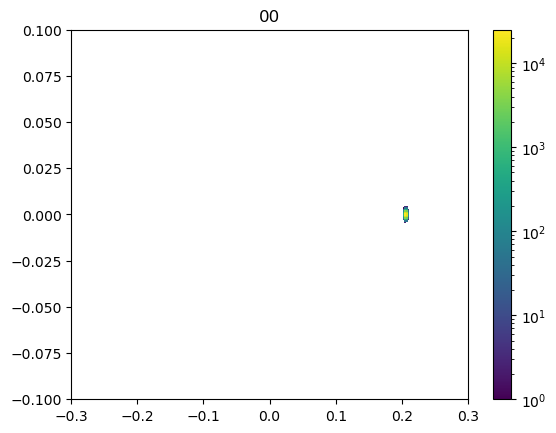

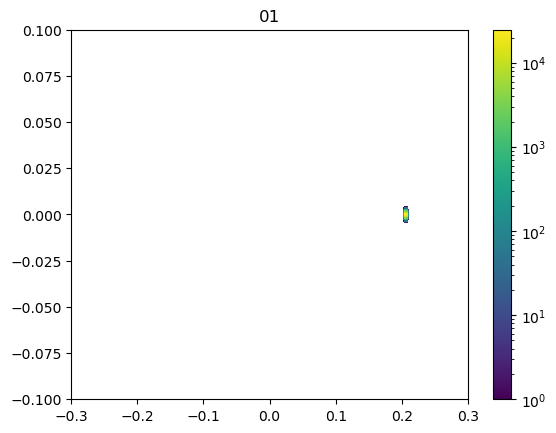

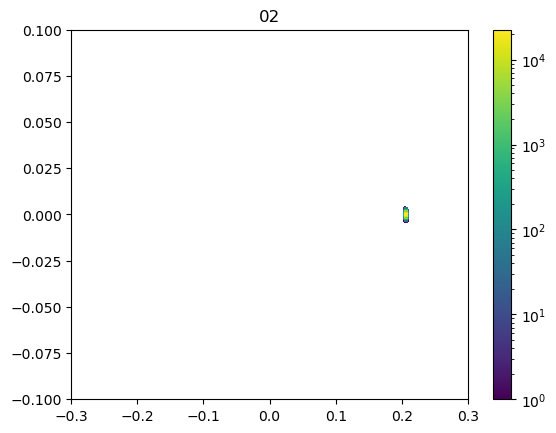

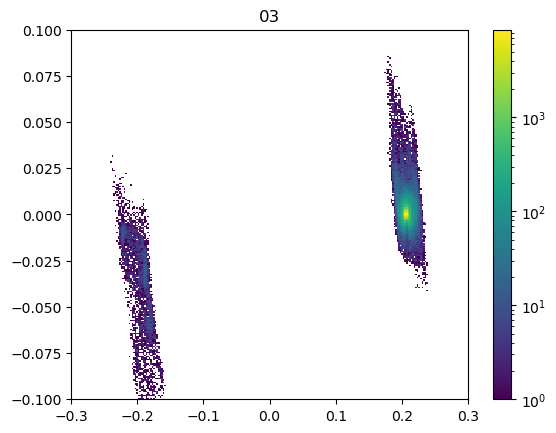

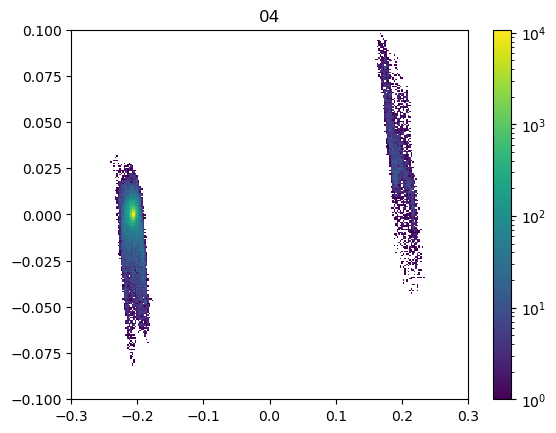

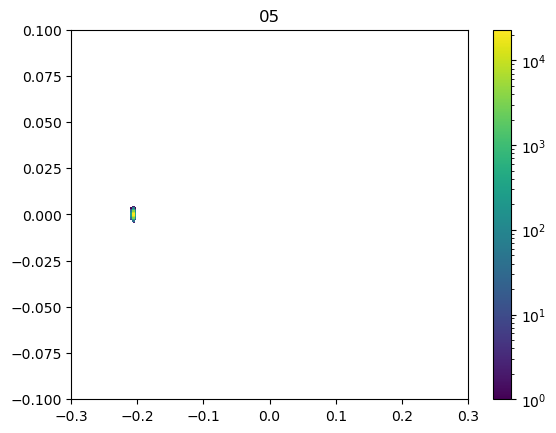

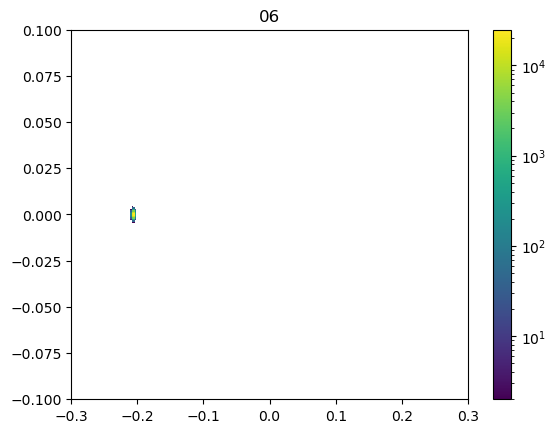

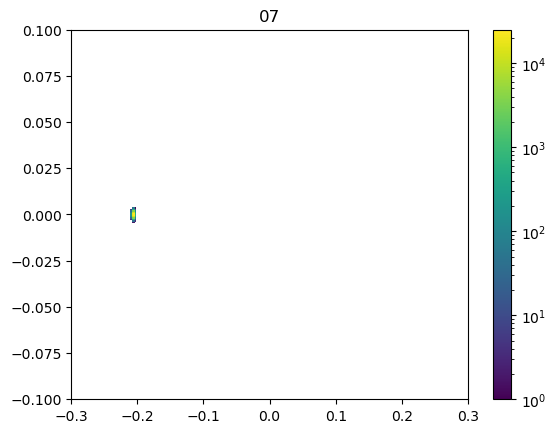

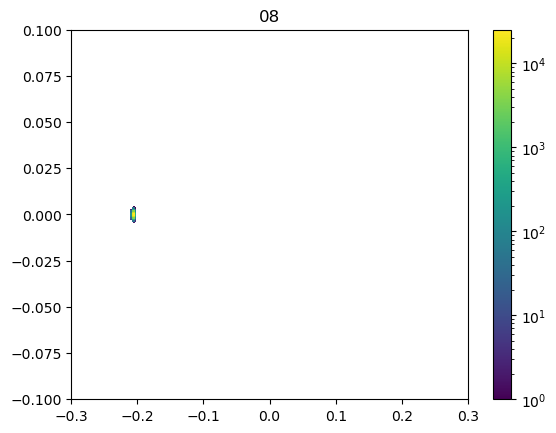

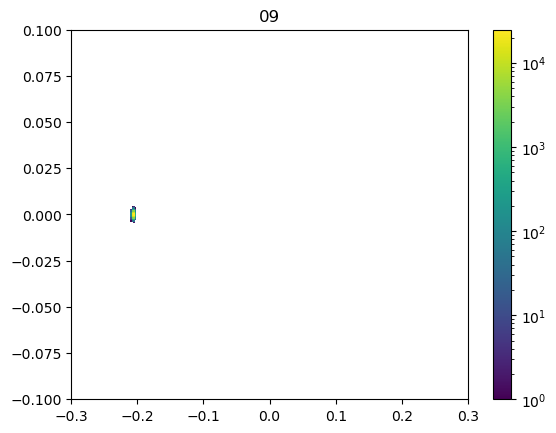

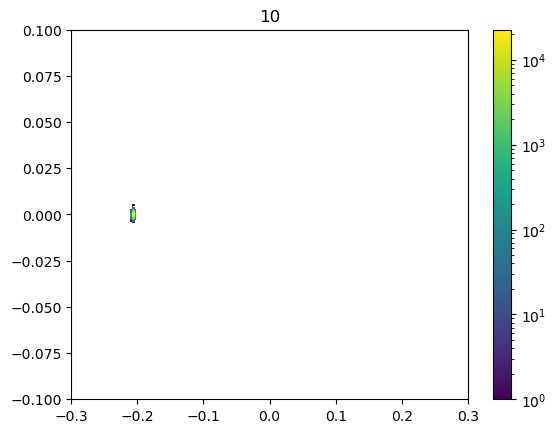

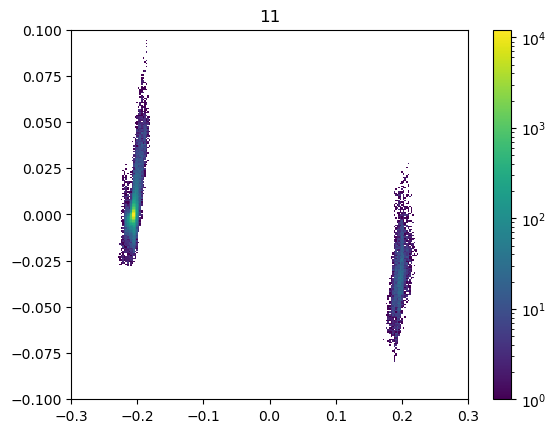

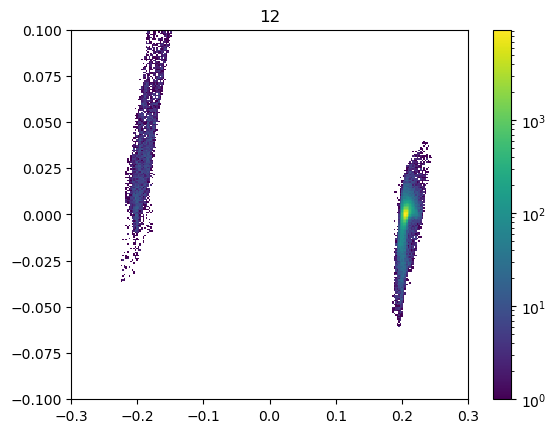

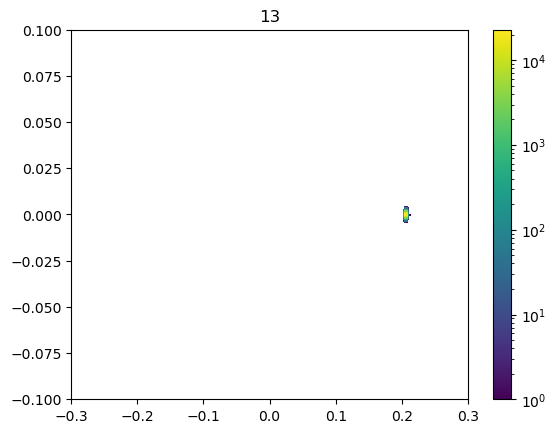

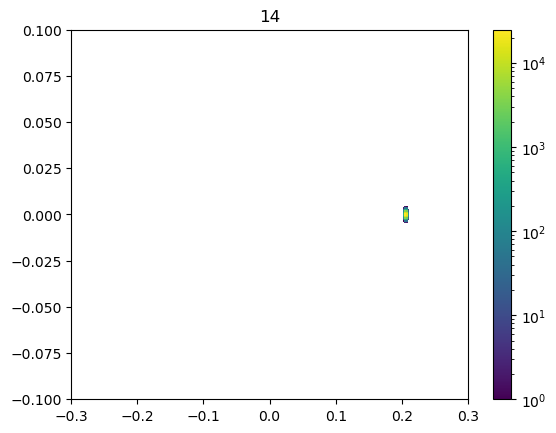

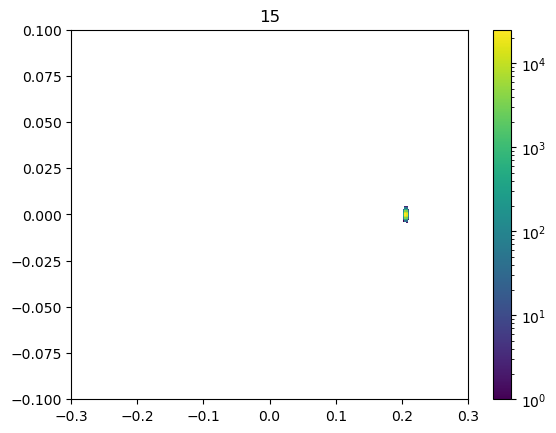

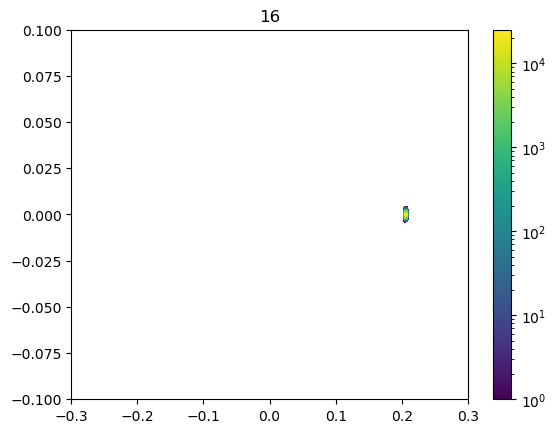

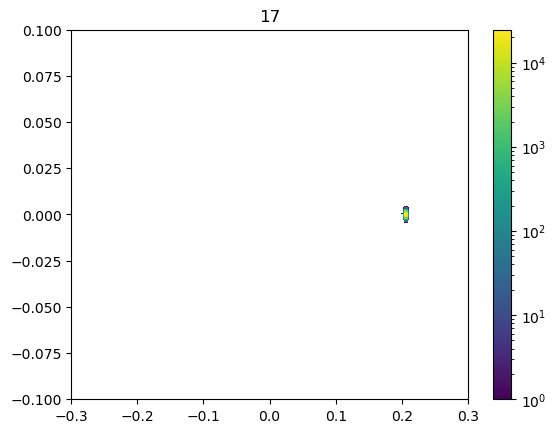

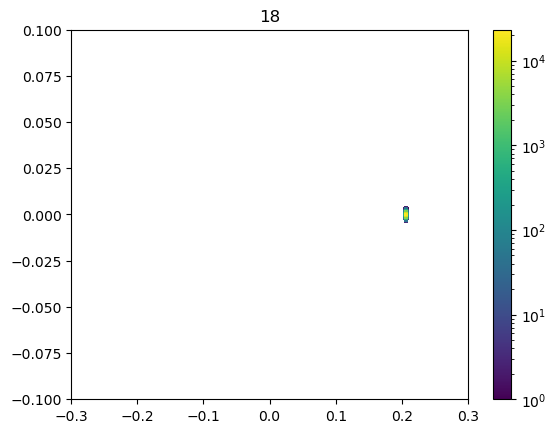

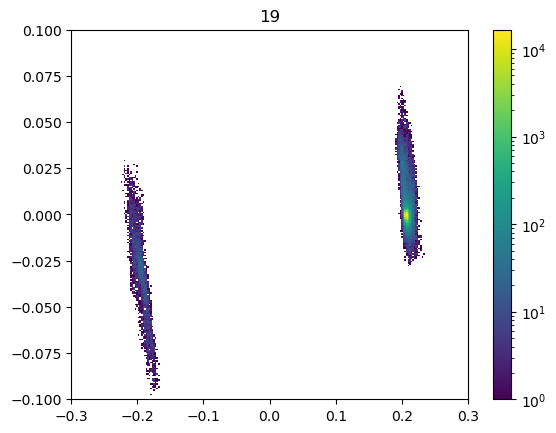

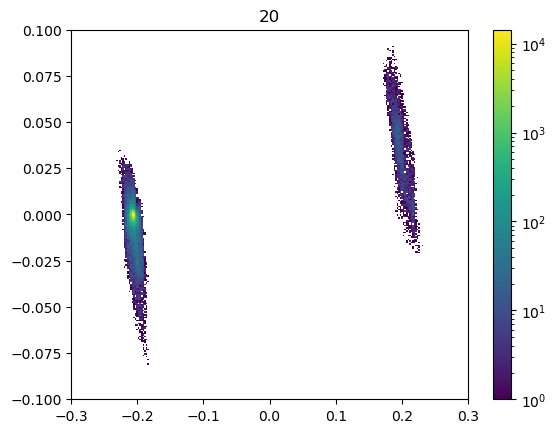

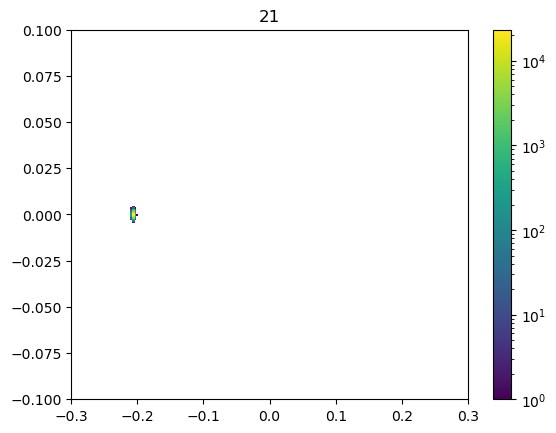

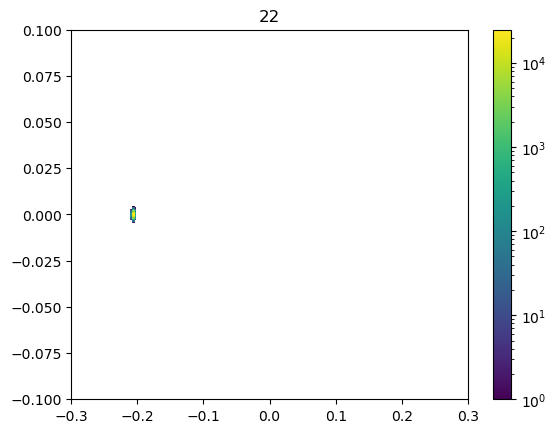

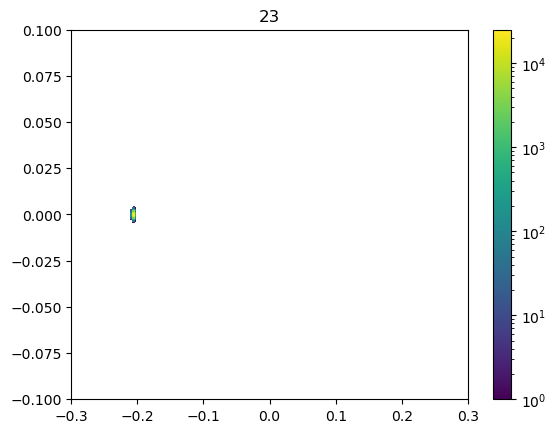

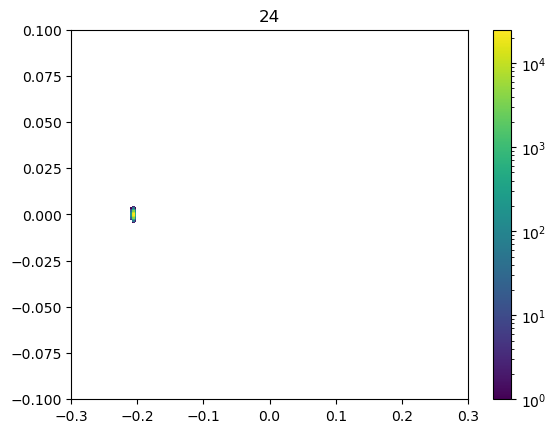

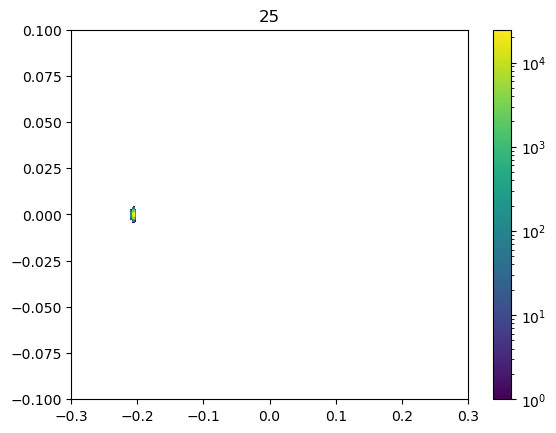

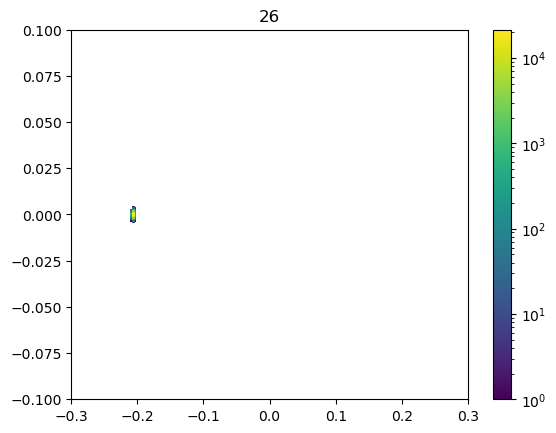

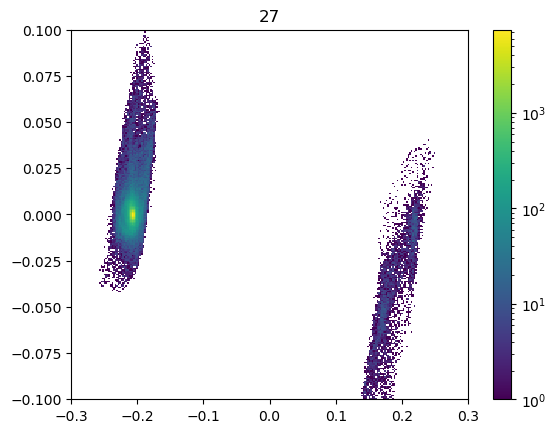

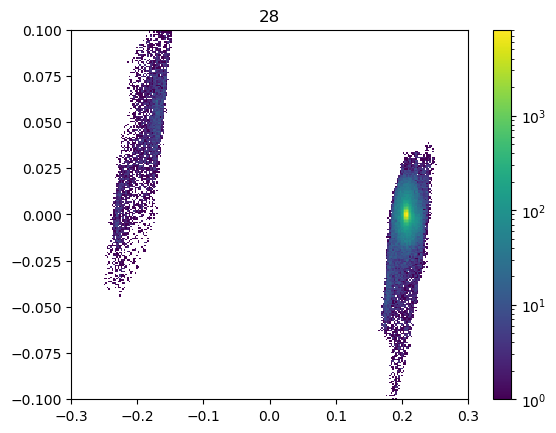

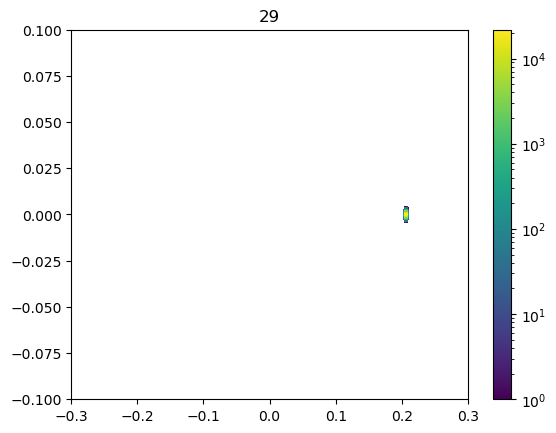

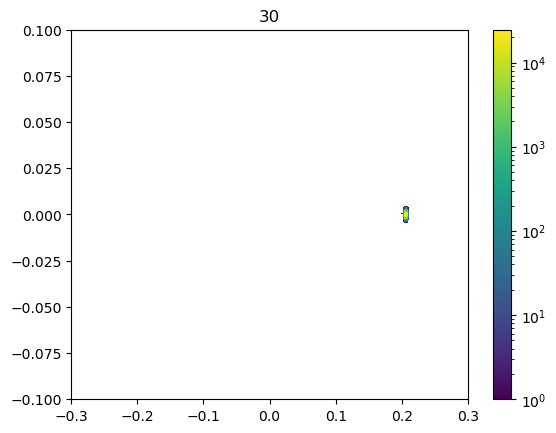

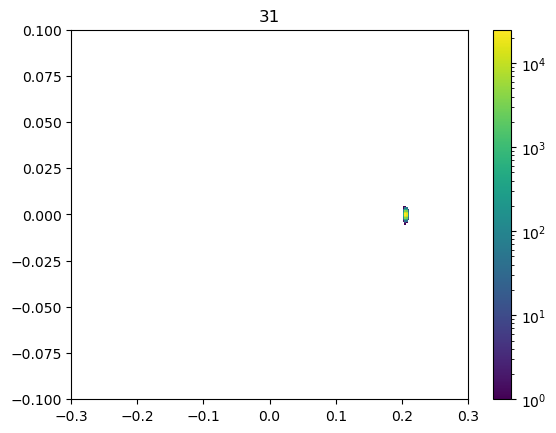

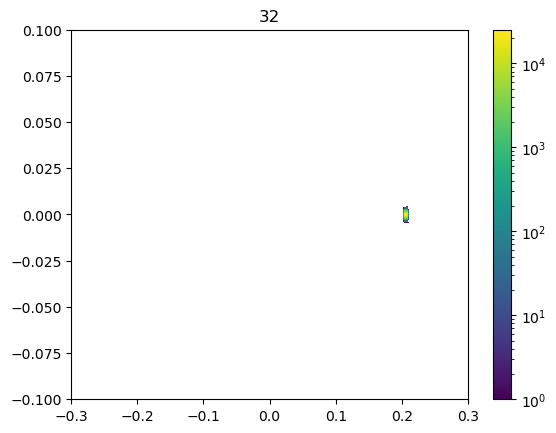

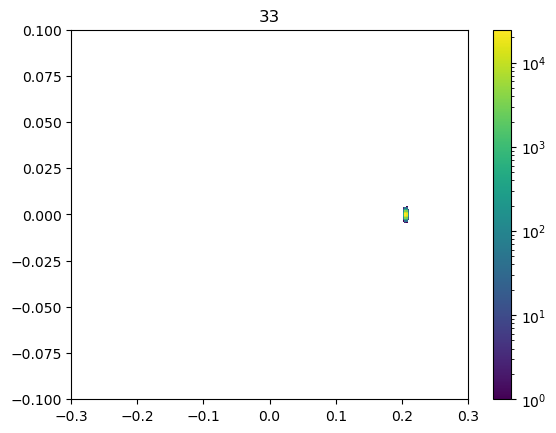

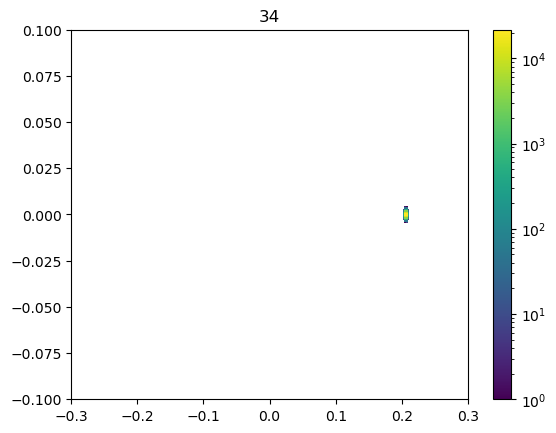

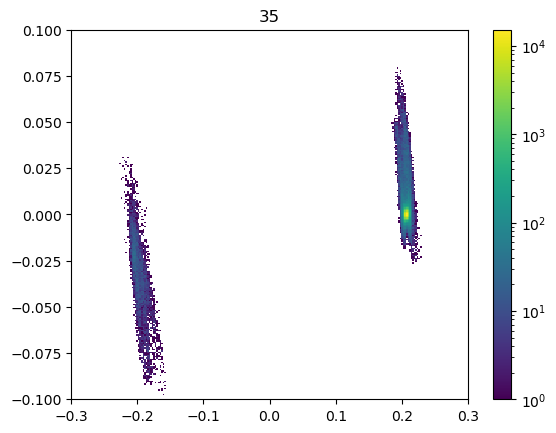

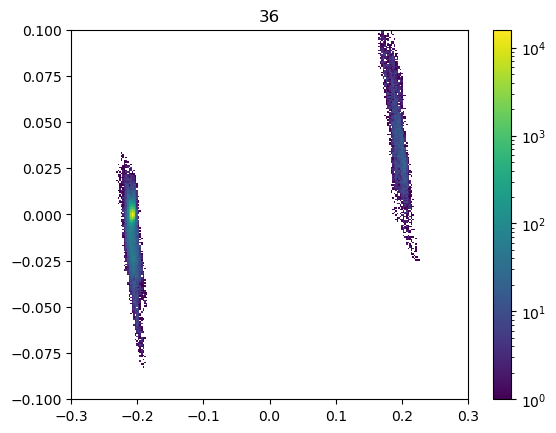

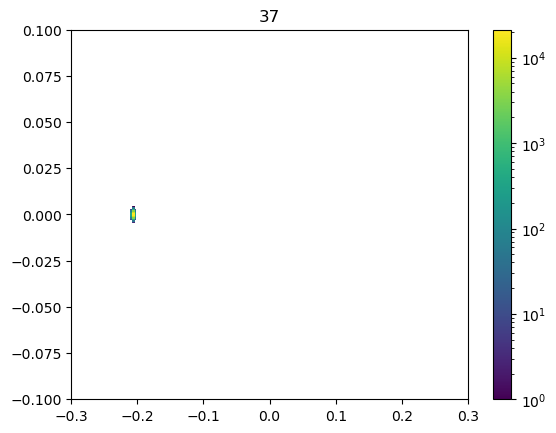

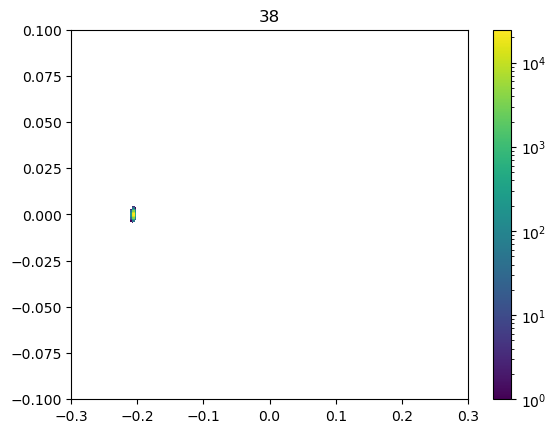

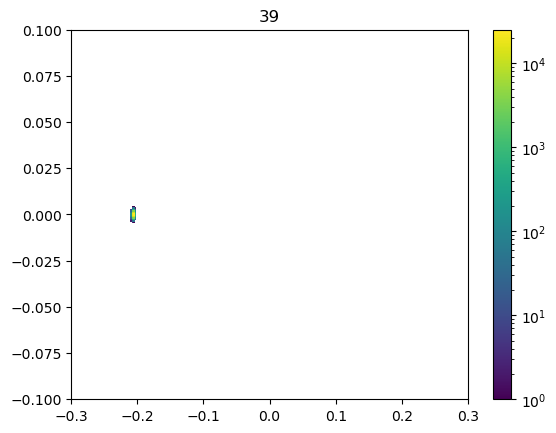

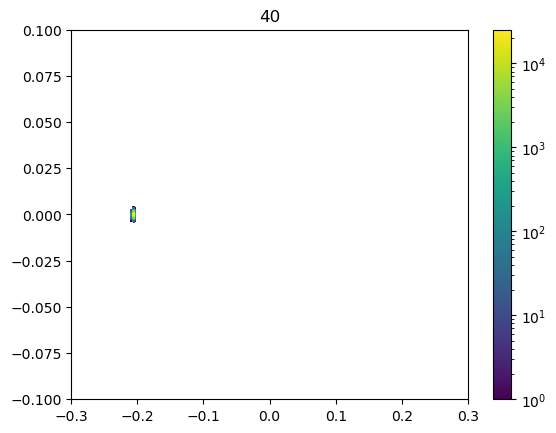

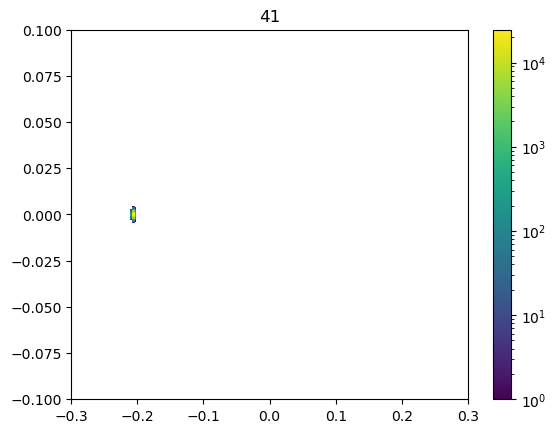

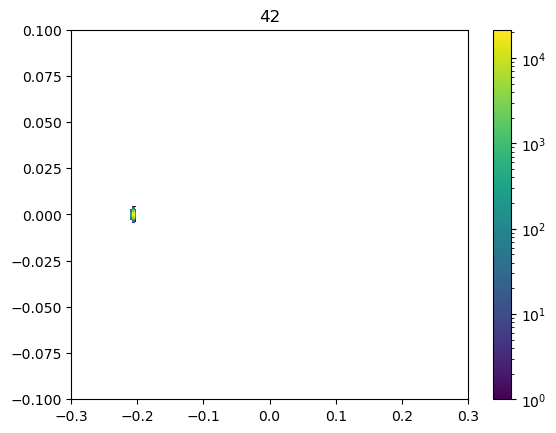

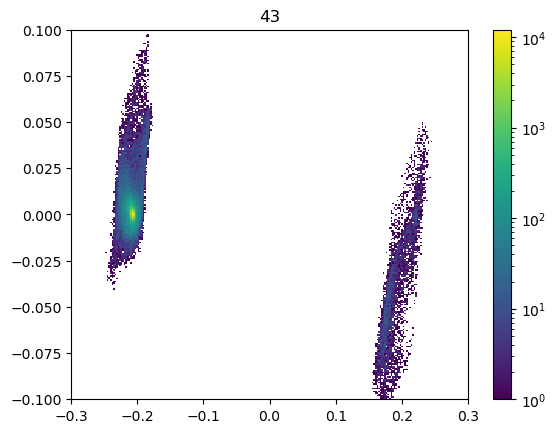

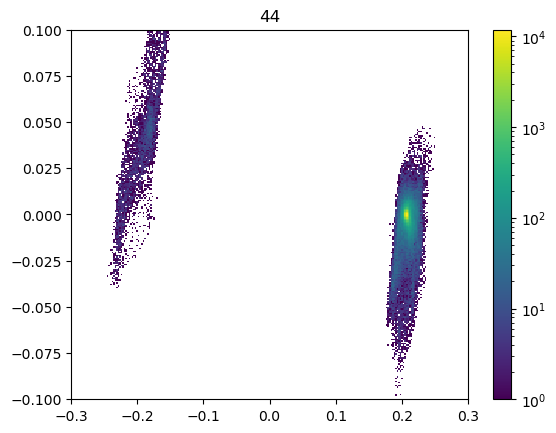

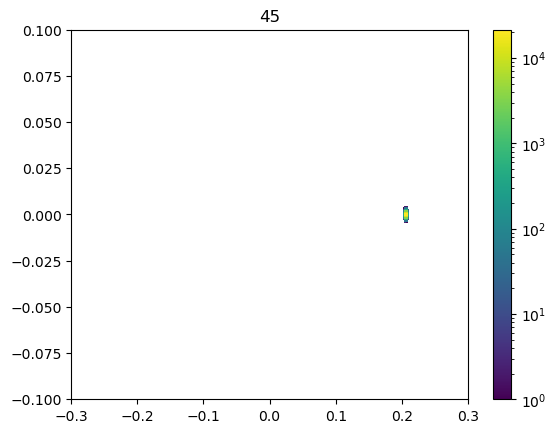

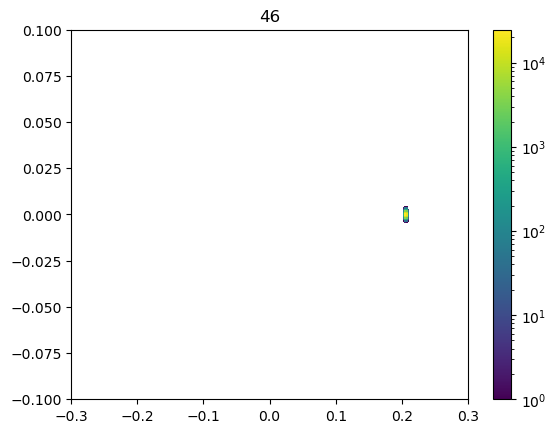

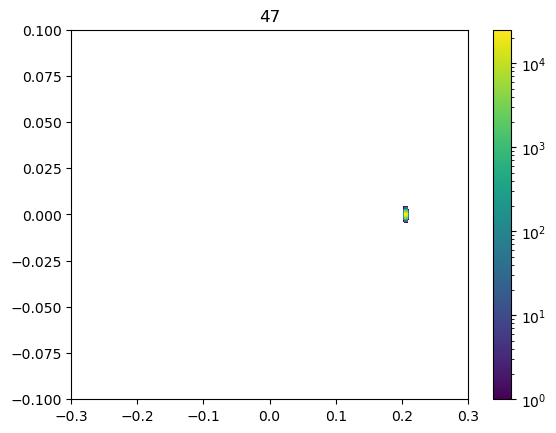

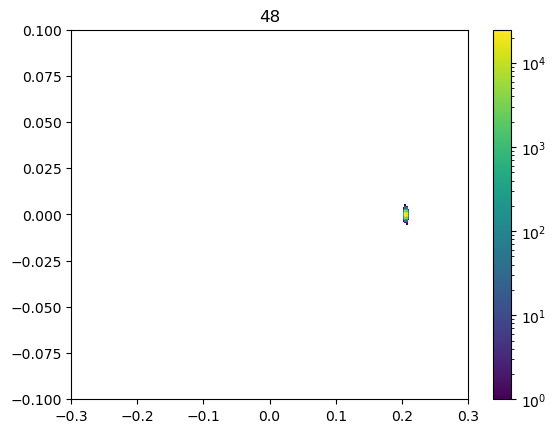

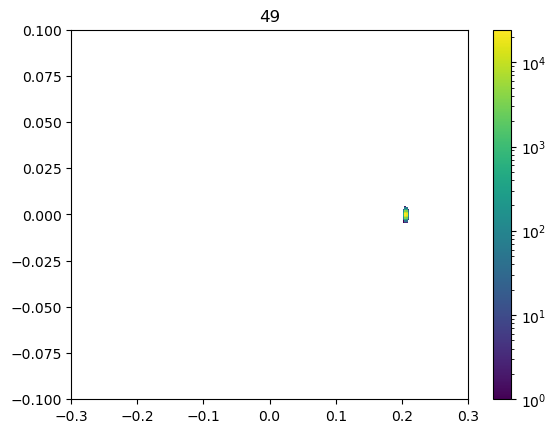

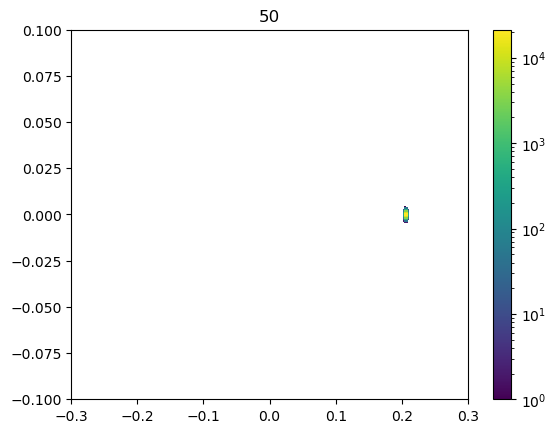

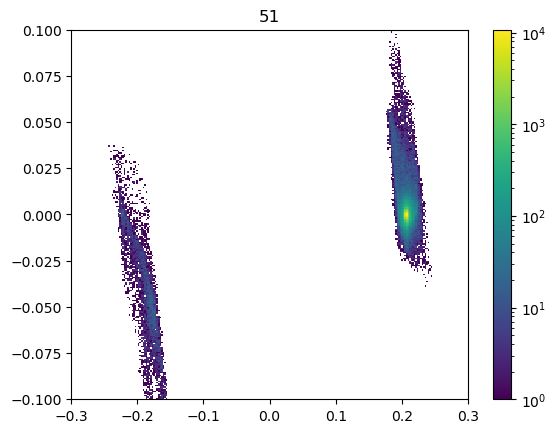

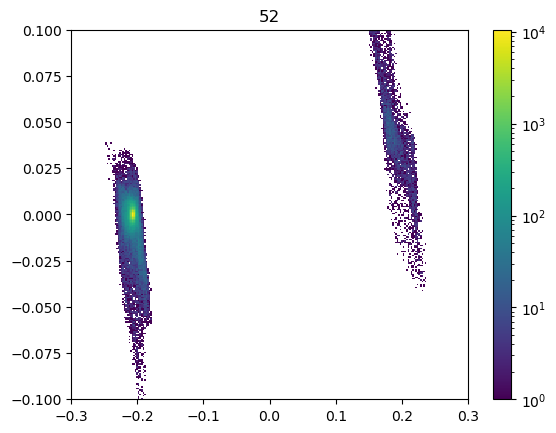

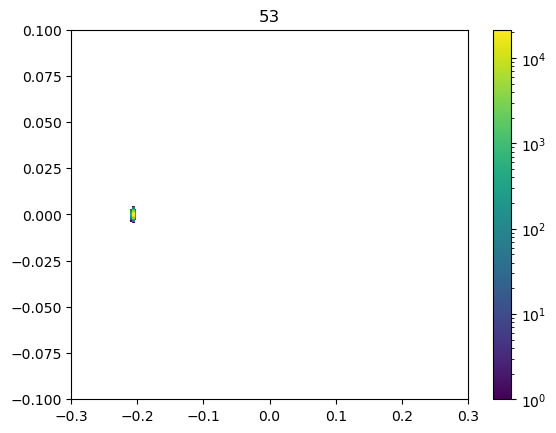

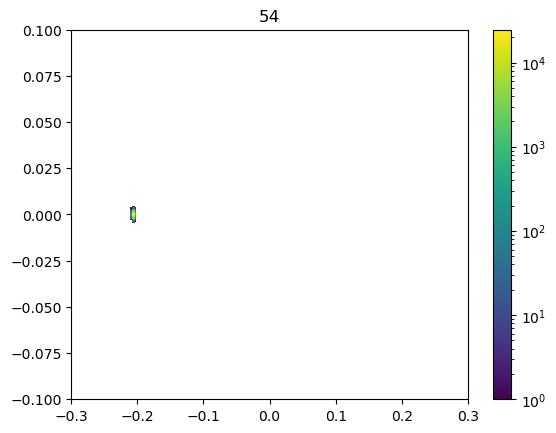

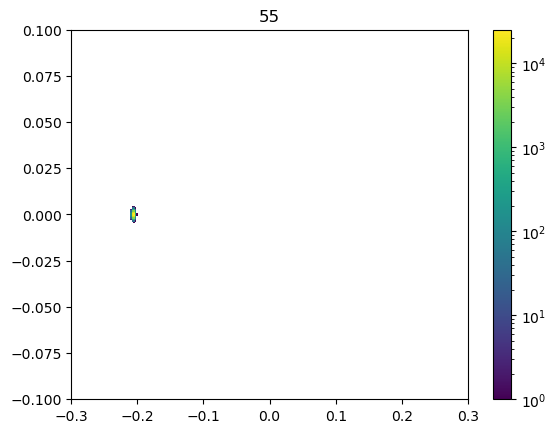

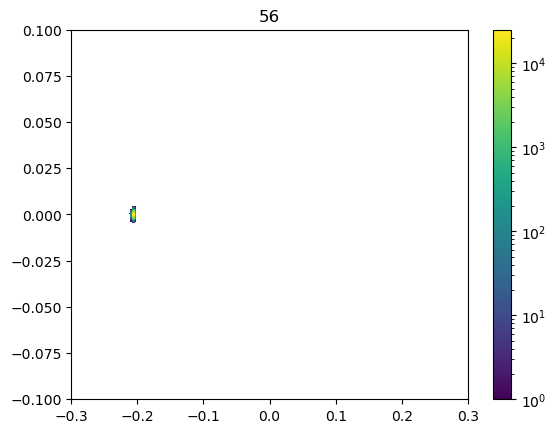

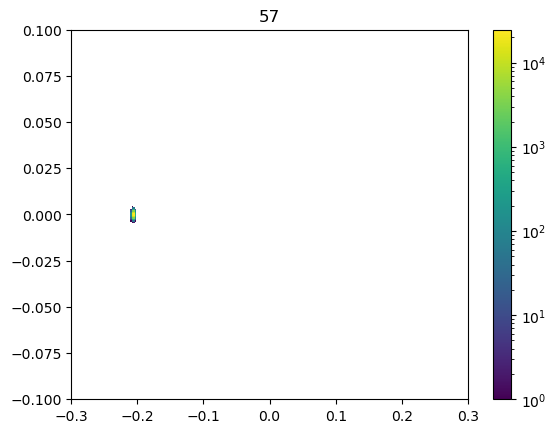

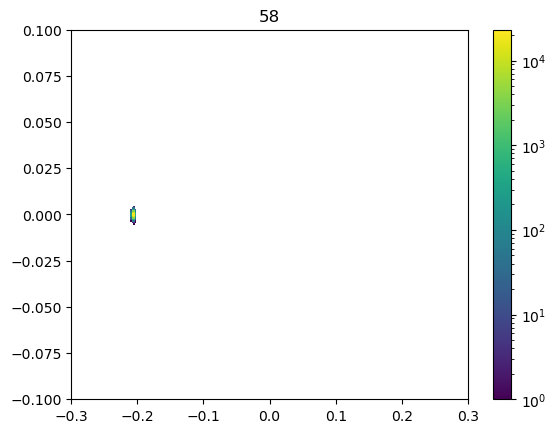

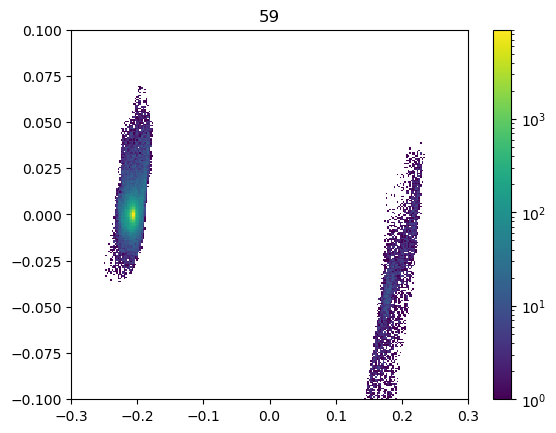

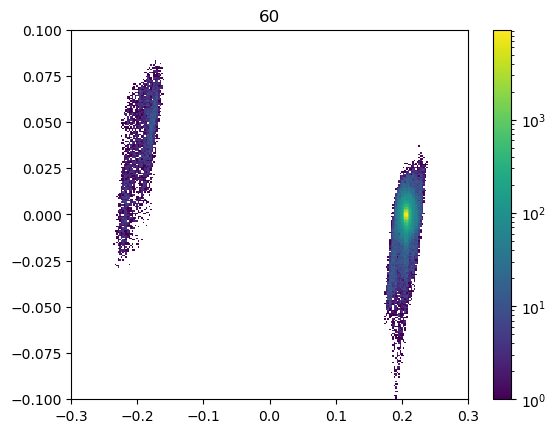

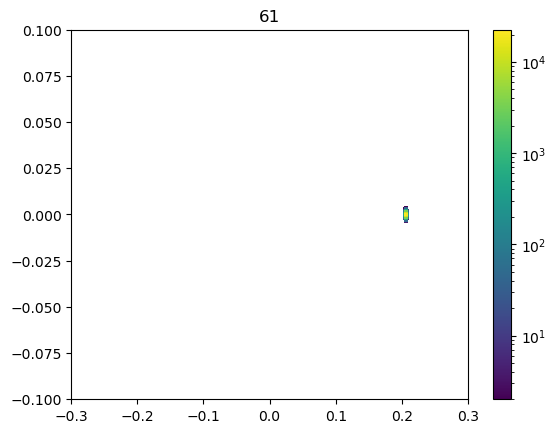

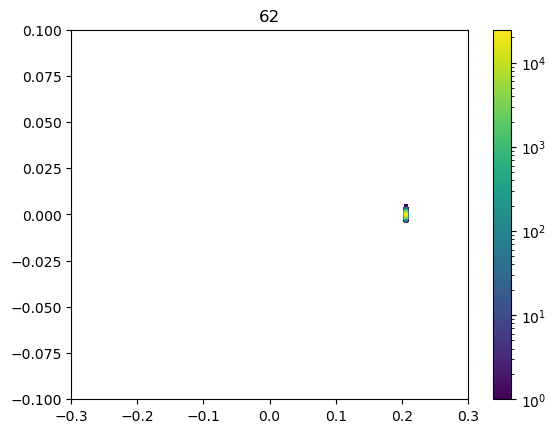

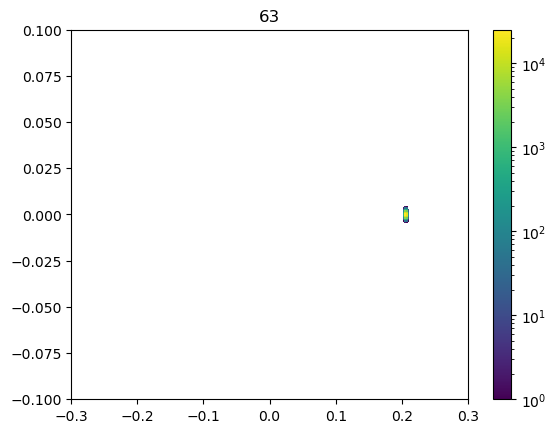

In [44]:
for i in range(N_GPUs):
    plt.hist2d(data_gpu[i]["ps_gt"][:, 0], data_gpu[i]["ps_gt"][:, 1], bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), norm=LogNorm(), label="{:02d}".format(i))
    plt.title("{:02d}".format(i))
    plt.colorbar()
    plt.show()

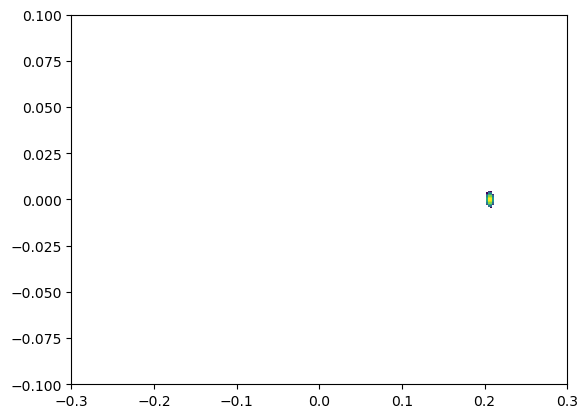

In [11]:
plt.hist2d(data_gpu_8["ps_gt"][:, 0], data_gpu_8["ps_gt"][:, 1], bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), norm=LogNorm())
plt.show()

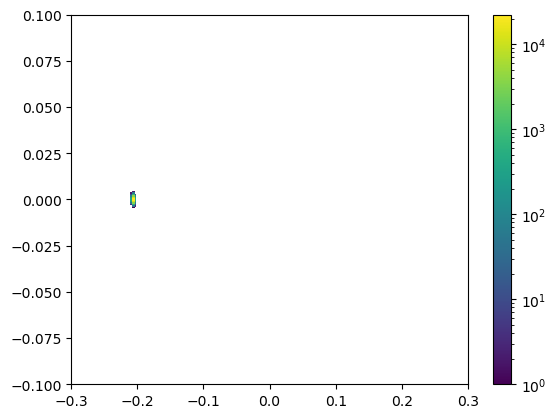

In [12]:
plt.hist2d(data_gpu_11["ps_gt"][:, 0], data_gpu_11["ps_gt"][:, 1], bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), norm=LogNorm())
plt.colorbar()
plt.show()

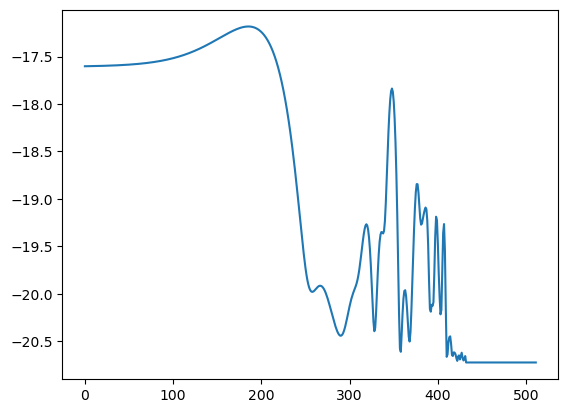

In [13]:
plt.plot(data_gpu_8["rad_gt"])

/var/folders/wb/mn2h09197fd15__361gwjmhh0000gp/T/ipykernel_1934/203166852.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


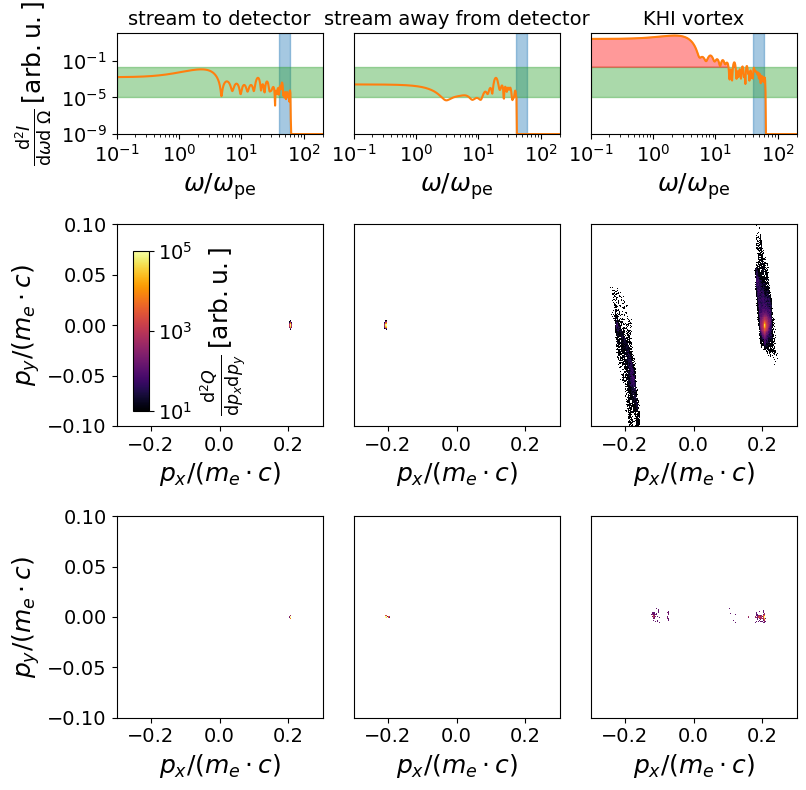

In [204]:
# will use GPUs 0, 5 and 4

gpu_index_toDetector = 61
gpu_index_awayFromDetector = 40 # 7 
gpu_index_vortex = 51 # 44 60 28 43 3 19 59 11 27

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 2, 2]) 


plt.subplot(gs[0])
plt.title("stream to detector", fontsize=14)
plt.fill_betweenx([1e-10, 1e2], 40 , 60, color="C0", alpha=0.4)
plt.fill_between([0.1, 2e2], 1e-5 , 2e-2, color="C2", alpha=0.4)

plt.plot(omega_rad, np.exp(data_gpu[gpu_index_toDetector]["rad_gt"]), color="C1")
plt.xscale("log")
plt.xlim(0.1, 200)
plt.yscale("log")
plt.ylim(1e-9, 1e+2)

plt.xlabel(r"$\omega /\omega_\mathrm{pe}$", fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel(r"$\frac{\mathrm{d}^2 I}{\mathrm{d} \omega \mathrm{d} \Omega} \, \mathrm{[arb.u.]}$", fontsize=18)
plt.yticks(fontsize=14)

plt.subplot(gs[1])
plt.title("stream away from detector", fontsize=14)
plt.fill_betweenx([1e-10, 1e2], 40 , 60, color="C0", alpha=0.4)
plt.fill_between([0.1, 2e2], 1e-5 , 2e-2, color="C2", alpha=0.4)
plt.plot(omega_rad, np.exp(data_gpu[gpu_index_awayFromDetector]["rad_gt"]), color="C1")

plt.xscale("log")
plt.xlim(0.1, 200)
plt.yscale("log")
plt.ylim(1e-9, 1e+2)

plt.xlabel(r"$\omega /\omega_\mathrm{pe}$", fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel("")#r"$\frac{\mathrm{d}^2 I}{\mathrm{d} \omega \mathrm{d} \Omega} \, \mathrm{[arb.u.]}$", fontsize=18)
plt.yticks([])#fontsize=14)


plt.subplot(gs[2])
plt.title("KHI vortex", fontsize=14)
plt.fill_betweenx([1e-10, 1e2], 40 , 60, color="C0", alpha=0.4)
plt.fill_between([0.1, 2e2], 1e-5 , 2e-2, color="C2", alpha=0.4)
plt.plot(omega_rad, np.exp(data_gpu[gpu_index_vortex]["rad_gt"]), color="C1")
plt.fill_between(omega_rad, np.exp(data_gpu[gpu_index_vortex]["rad_gt"]), 2e-2, color="red", alpha=0.4, where=np.greater(np.exp(data_gpu[gpu_index_vortex]["rad_gt"]), 2e-2))

plt.xscale("log")
plt.xlim(0.1, 200)
plt.yscale("log")
plt.ylim(1e-9, 1e+2)

plt.xlabel(r"$\omega /\omega_\mathrm{pe}$", fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel("")#r"$\frac{\mathrm{d}^2 I}{\mathrm{d} \omega \mathrm{d} \Omega} \, \mathrm{[arb.u.]}$", fontsize=18)
plt.yticks([])#fontsize=14)


plt.subplot(gs[3])

plt.hist2d(data_gpu[gpu_index_toDetector]["ps_gt"][:, 0], data_gpu[gpu_index_toDetector]["ps_gt"][:, 1], 
           bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), density=True,
           norm=LogNorm(vmin=1e1, vmax= 1e5), cmap=plt.cm.inferno, rasterized=True)
#plt.colorbar()


plt.xlabel(r"$p_x / (m_e \cdot c)}$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel(r"$p_y / (m_e \cdot c)}$", fontsize=18)
plt.yticks(fontsize=14)


plt.subplot(gs[4])


plt.hist2d(data_gpu[gpu_index_awayFromDetector]["ps_gt"][:, 0], data_gpu[gpu_index_awayFromDetector]["ps_gt"][:, 1], 
           bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), density=True,
           norm=LogNorm(vmin=1e1, vmax= 1e5), cmap=plt.cm.inferno, rasterized=True)
#plt.colorbar()


plt.xlabel(r"$p_x / (m_e \cdot c)}$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel("")#r"$p_y / (m_e \cdot c)}$", fontsize=18)
plt.yticks([])#fontsize=14)


plt.subplot(gs[5])

hist3 = plt.hist2d(data_gpu[gpu_index_vortex]["ps_gt"][:, 0], data_gpu[gpu_index_vortex]["ps_gt"][:, 1], 
           bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), density=True,
           norm=LogNorm(vmin=1e1, vmax= 1e5), cmap=plt.cm.inferno, rasterized=True)
#plt.colorbar()


plt.xlabel(r"$p_x / (m_e \cdot c)}$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel("")#r"$p_y / (m_e \cdot c)}$", fontsize=18)
plt.yticks([])#fontsize=14)







plt.subplot(gs[6])

plt.hist2d(data_gpu[gpu_index_toDetector]["ps_pr_inn"][:, 0], data_gpu[gpu_index_toDetector]["ps_pr_inn"][:, 1], 
           bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), density=True,
           norm=LogNorm(vmin=1e1, vmax= 1e5), cmap=plt.cm.inferno, rasterized=True)
#plt.colorbar()


plt.xlabel(r"$p_x / (m_e \cdot c)}$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel(r"$p_y / (m_e \cdot c)}$", fontsize=18)
plt.yticks(fontsize=14)


plt.subplot(gs[7])


plt.hist2d(data_gpu[gpu_index_awayFromDetector]["ps_pr_inn"][:, 0], data_gpu[gpu_index_awayFromDetector]["ps_pr_inn"][:, 1], 
           bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), density=True,
           norm=LogNorm(vmin=1e1, vmax= 1e5), cmap=plt.cm.inferno, rasterized=True)
#plt.colorbar()


plt.xlabel(r"$p_x / (m_e \cdot c)}$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel("")#r"$p_y / (m_e \cdot c)}$", fontsize=18)
plt.yticks([])#fontsize=14)


plt.subplot(gs[8])

plt.hist2d(data_gpu[gpu_index_vortex]["ps_pr_inn"][:, 0], data_gpu[gpu_index_vortex]["ps_pr_inn"][:, 1], 
           bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), density=True,
           norm=LogNorm(vmin=1e1, vmax= 1e5), cmap=plt.cm.inferno, rasterized=True)
#plt.colorbar()


plt.xlabel(r"$p_x / (m_e \cdot c)}$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel("")#r"$p_y / (m_e \cdot c)}$", fontsize=18)
plt.yticks([])#fontsize=14)



ax = fig.add_axes([0.12, 0.48, 0.02, 0.20])
cb = plt.colorbar(hist3[-1], cax=ax)

cb.set_label(r"$\frac{\mathrm{d}^2Q}{\mathrm{d}p_x \mathrm{d} p_y} \, \mathrm{[arb.u.]}$", fontsize=18)
for i in cb.ax.get_yticklabels():
    i.set_fontsize(14)
    

plt.tight_layout()

fig.subplots_adjust(wspace=0.15, left=0.10, right=0.95)

plt.savefig("spec_to_phaseSpace_inversINN.pdf")
plt.show()

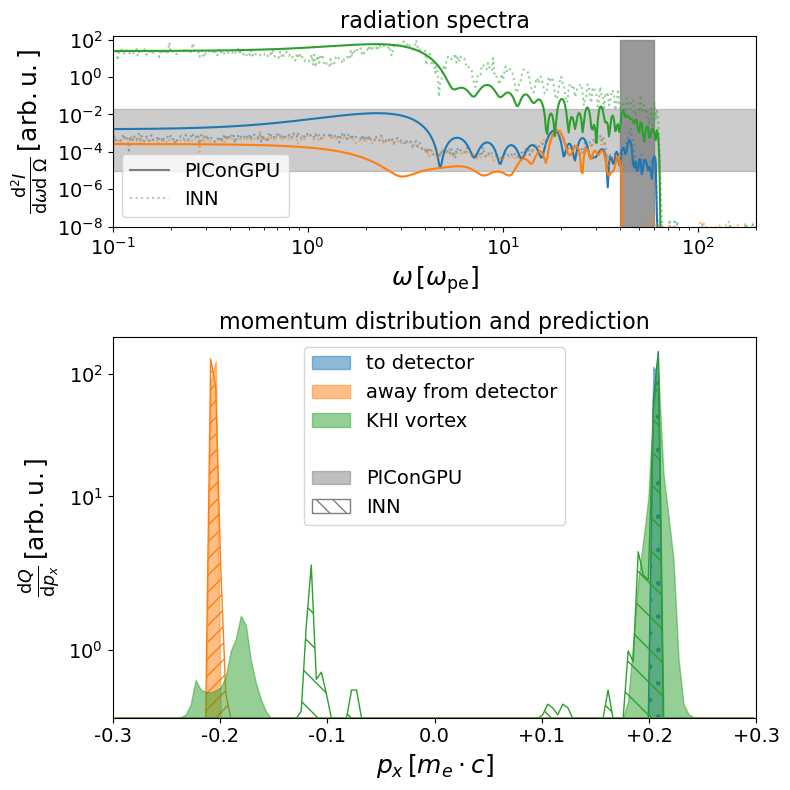

In [216]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2]) 


plt.subplot(gs[0])
plt.title("radiation spectra", fontsize=16)
plt.fill_betweenx([1e-10, 1e2], 40 , 60, color="gray", alpha=0.8)
plt.fill_between([0.1, 2e2], 1e-5 , 2e-2, color="gray", alpha=0.4)

plt.plot(omega_rad, np.exp(data_gpu[gpu_index_toDetector]["rad_gt"]), color="C0")
plt.plot(omega_rad, np.exp(data_gpu[gpu_index_toDetector]["rad_pred"]), ":", color="C0", alpha=0.5)

plt.plot(omega_rad, np.exp(data_gpu[gpu_index_awayFromDetector]["rad_gt"]), color="C1")
plt.plot(omega_rad, np.exp(data_gpu[gpu_index_awayFromDetector]["rad_pred"]), ":", color="C1", alpha=0.5)

plt.plot(omega_rad, np.exp(data_gpu[gpu_index_vortex]["rad_gt"]), color="C2")
plt.plot(omega_rad, np.exp(data_gpu[gpu_index_vortex]["rad_pred"]), ":", color="C2", alpha=0.5)


plt.plot([5], [5], color="gray", label="PIConGPU")
plt.plot([5], [5], ":", color="gray", alpha=0.5, label="INN")

plt.legend(loc=3, fontsize=14)
         
plt.xscale("log")
plt.xlim(0.1, 200)
plt.yscale("log")
plt.ylim(1e-8, 1.5e+2)

plt.xlabel(r"$\omega \, [\omega_\mathrm{pe}]$", fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel(r"$\frac{\mathrm{d}^2 I}{\mathrm{d} \omega \mathrm{d} \Omega} \, \mathrm{[arb.u.]}$", fontsize=18)
plt.yticks(fontsize=14)


plt.subplot(gs[1])

plt.title("momentum distribution and prediction", fontsize=16)
# to detector
tmp = np.histogram(data_gpu[gpu_index_toDetector]["ps_gt"][:, 0],
                   bins=128, range=(-0.3, +0.3), 
                   density=True)
plt.fill_between((tmp[1][1:] + tmp[1][:-1])/2., tmp[0], 0, lw=1, color="C0", alpha=0.5, label="to detector")

tmp = np.histogram(data_gpu[gpu_index_toDetector]["ps_pr_inn"][:, 0],
                   bins=128, range=(-0.3, +0.3), 
                   density=True)
plt.fill_between((tmp[1][1:] + tmp[1][:-1])/2., tmp[0], 0, lw=1, color="C0", alpha=1.0, hatch='.', facecolor="None")

# away from detector
tmp = np.histogram(data_gpu[gpu_index_awayFromDetector]["ps_gt"][:, 0],
                   bins=128, range=(-0.3, +0.3), 
                   density=True)
plt.fill_between((tmp[1][1:] + tmp[1][:-1])/2., tmp[0], 0, lw=1, color="C1", alpha=0.5, label="away from detector")

tmp = np.histogram(data_gpu[gpu_index_awayFromDetector]["ps_pr_inn"][:, 0],
                   bins=128, range=(-0.3, +0.3), 
                   density=True)
plt.fill_between((tmp[1][1:] + tmp[1][:-1])/2., tmp[0], 0, lw=1, color="C1", alpha=1.0, hatch='//', facecolor="None")


# KHI vortex
tmp = np.histogram(data_gpu[gpu_index_vortex]["ps_gt"][:, 0],
                   bins=128, range=(-0.3, +0.3), 
                   density=True)
plt.fill_between((tmp[1][1:] + tmp[1][:-1])/2., tmp[0], 0.0, lw=1, color="C2", alpha=0.5, label="KHI vortex")

tmp = np.histogram(data_gpu[gpu_index_vortex]["ps_pr_inn"][:, 0],
                   bins=128, range=(-0.3, +0.3), 
                   density=True)
plt.fill_between((tmp[1][1:] + tmp[1][:-1])/2., tmp[0], 0, lw=1, color="C2", alpha=1.0, hatch='\\', facecolor="None")


plt.yscale("symlog")
plt.xscale("symlog")

plt.ylim(1e-2, 2e2)
plt.xticks([-0.3, -0.2, -0.1, 0.0, +0.1, +0.2, +0.3], ["-0.3", "-0.2", "-0.1", "0.0", "+0.1", "+0.2", "+0.3"])
plt.xlim(-0.3, +0.3)

plt.xlabel(r"$p_x \, [m_e \cdot c]$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel(r"$\frac{\mathrm{d}Q}{\mathrm{d} p_x} \, \mathrm{[arb.u.]}$", fontsize=18)
plt.yticks(fontsize=14)

plt.fill_between([1, 2], [1,2], 0, lw=1, color="white", alpha=1.0, hatch='\\\\', facecolor="None", label=" ")
plt.fill_between([1, 2], [1,2], 0, lw=1, color="gray", alpha=0.5,  label="PIConGPU")
plt.fill_between([1, 2], [1,2], 0, lw=1, color="gray", alpha=1.0, hatch='\\\\', facecolor="None", label="INN")


plt.legend(loc=9, fontsize=14)

plt.tight_layout()

#fig.subplots_adjust(wspace=0.15, left=0.10, right=0.95)

plt.savefig("spec_to_phaseSpace_inversINN_simple.pdf")

plt.show()

In [156]:
plt.fill_between?

Signature:
plt.fill_between(
    x,
    y1,
    y2=0,
    where=None,
    interpolate=False,
    step=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*,
*y2*).  This creates one or multiple polygons describing the filled
area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly.  Use *step*
if the filling should be a step function, i.e. constant in between
*x*.

Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional
    Define *where* to exclude some horizontal regions from being filled.
    The filled regions are defined

In [ ]:
for data in [data_gpu_8, data_gpu_9, data_gpu_10, data_gpu_11, data_gpu_13, data_gpu_14]:

    plt.hist2d(data["ps_gt"][:, 0], data["ps_gt"][:, 1], 
               bins=256, range=((-0.3, +0.3),(-0.1, +0.1)), density=True,
               norm=LogNorm(), cmap=plt.cm.inferno, rasterized=True)
    #plt.colorbar()


    plt.xlabel(r"$p_x / (m_e \cdot c)}$", fontsize=18)
    plt.xticks(fontsize=14)

    plt.ylabel(r"$p_y / (m_e \cdot c)}$", fontsize=18)
    plt.yticks(fontsize=14)
    plt.colorbar()
    plt.show()